# Imports libraries. Defines a parseData function which gives the county, month, and incident type for a given SQL query. 
# Establishes strings for the SQL queries.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import MySQLdb
import dateutil
import datetime
import matplotlib.dates as mdates

conn = MySQLdb.connect(host="localhost", user="i501fa18_group7", passwd="rEm9z3dRGW11", db="i501fa18_group7")

cursor = conn.cursor()
#these are the strings for the queries. It pulls data, emrgency type(excluding nulls) and county for each row.
#one string exists for each year
str2014 = "select INC_INCIDENTDATE as Date, INC_County as County,SIT_PROVIDER_PRIM_IMPRESSION as Type from emergency_medical_service_runs_2014"
str2015 = "select INC_INCIDENTDATE as Date, INC_County as County,SIT_PROVIDER_PRIM_IMPRESSION as Type from emergency_medical_service_runs_2015"
str2016 = "select INC_INCIDENTDATE as Date, INC_County as County,SIT_PROVIDER_PRIM_IMPRESSION as Type from emergency_medical_service_runs_2016"
str2017 = "select INC_INCIDENTDATE as Date, INC_County as County,SIT_PROVIDER_PRIM_IMPRESSION as Type from emergency_medical_service_runs_2017"
#function takes one of the strings above as input
def parseData(string):
    months = [] #an array to hold the months
    county = [] #an aray to hold the county
    incident = [] #array to hold incident type
    cursor.execute(string)
    rows = cursor.fetchall()
    for row in rows:
        d = dateutil.parser.parse(row[0]) #changes the date into a useable number
        m = d.month #turns date in a 1-12 value for the month
        months.append(m) #appends month to month array
        county.append(row[1]) #appends county to county array
        incident.append(row[2]) #appends incident to incident array
    return months, county, incident

#esablishes month, county, and incident data for each year
#m14, c14, i14 = parseData(str2014)
#m15, c15, i15 = parseData(str2015)
#m16, c16, i16 = parseData(str2016)
#m17, c17, i17 = parseData(str2017)





## Defines function sortByMonth, uses month to divide the counties and incident types into quarters of the year.

In [4]:
def sortByMonth(months, counties, incidents):
    c1 =[] #estabishes arrays for the counties and incidents for each quarter
    c2 =[]
    c3 =[]
    c4 =[]
    i1 =[]
    i2 =[]
    i3 =[]
    i4 =[]
    for i in range (len(months)): #uses month value and if/else statements to append data to array for proper quarter
        if months[i] < 4:
            c1.append(counties[i])
            i1.append(incidents[i])
        elif months[i] < 7:
            c2.append(counties[i])
            i2.append(incidents[i])
        elif months[i] < 10:
            c3.append(counties[i])
            i3.append(incidents[i])
        else:
            c4.append(counties[i])
            i4.append(incidents[i])
    return c1, c2, c3, c4, i1, i2, i3, i4
#uses function on data from each year, returns data for each quarter
c14a, c14b, c14c, c14d, i14a, i14b, i14c, i14d = sortByMonth(m14, c14, i14)
c15a, c15b, c15c, c15d, i15a, i15b, i15c, i15d = sortByMonth(m15, c15, i15)
c16a, c16b, c16c, c16d, i16a, i16b, i16c, i16d = sortByMonth(m16, c16, i16)
c17a, c17b, c17c, c17d, i17a, i17b, i17c, i17d = sortByMonth(m17, c17, i17)
       

## Establishes strings to get the emergency types and their counts for each year


In [1]:
# ignores null values, pulls unique values of the incident coulmn along with their counts and orders by count
str1 = "SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION) FROM emergency_medical_service_runs_2014 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
str2 = "SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION) FROM emergency_medical_service_runs_2015 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
str3 = "SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION) FROM emergency_medical_service_runs_2016 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
str4 = "SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION) FROM emergency_medical_service_runs_2017 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"

## Defines a function topValues which takes an SQL query string and a title and returns the top emergencies for that year and graphs the top 10. Draws graph for 2014


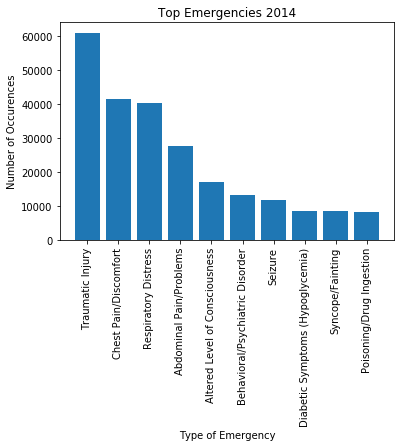

In [19]:

def topValues(string, title):
    emergency = []
    counts = []
    cursor.execute(string)
    rows = cursor.fetchall()
    for row in rows[:10]: #uses the top 10 incidents by count to establish the data to be graphed
        emergency.append(row[0])
        counts.append(row[1])
    plt.bar(emergency, counts)
    plt.title(title)
    plt.xlabel("Type of Emergency")
    plt.xticks(rotation=90)
    plt.ylabel("Number of Occurences")
    plt.show()
topValues(str1, 'Top Emergencies 2014')




## Draws graph for 2015

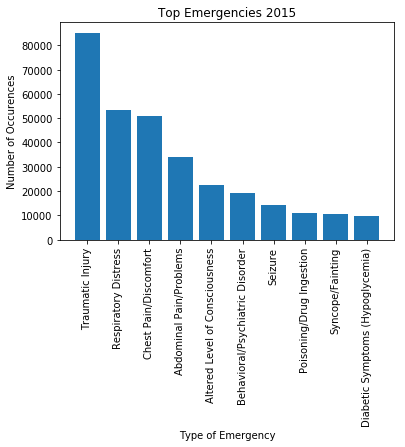

In [20]:
topValues(str2, 'Top Emergencies 2015')

## Draws graph for 2016

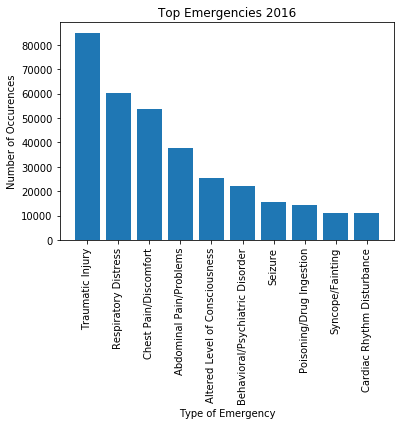

In [22]:
topValues(str3, "Top Emergencies 2016")

## Draws graph for 2017

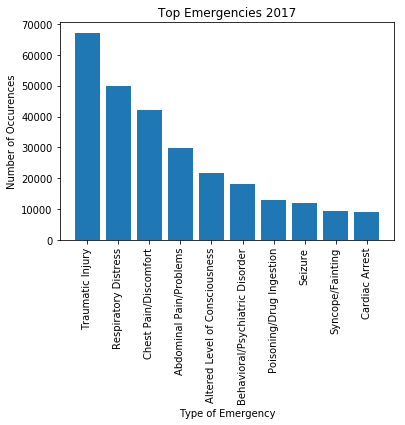

In [23]:
topValues(str4, "Top Emergencies 2017")

## After examining top emergencies for each year, the most common are put into the array topemergencies. The quarters of the year are in array 'quarters' to use as an x axis in future graphs. Defines getCounts funtion which takes an array and a value and appends the count of the value for each quarter.



In [41]:
topemergencies=["Traumatic Injury", "Respirtory Distress", "Chest Pain/Discomfort", 
                "Abdominal Pain/Problems", "Altered Level of Consciousness"]
quarters=['2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4', '2015 Q1', '2015 Q2', '2015 Q3', 
          '2015 Q4', '2016 Q1', '2016 Q2', '2016 Q3', '2016 Q4', '2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4']
#looks for a given value (in this case a string for incident type) and counts the number of times it appears each quarter
def getCounts(array, value):
    array.append(i14a.count(value))
    array.append(i14b.count(value))
    array.append(i14c.count(value))
    array.append(i14d.count(value))
    array.append(i15a.count(value))
    array.append(i15b.count(value))
    array.append(i15c.count(value))
    array.append(i15d.count(value))
    array.append(i16a.count(value))
    array.append(i16b.count(value))
    array.append(i16c.count(value))
    array.append(i16d.count(value))
    array.append(i17a.count(value))
    array.append(i17b.count(value))
    array.append(i17c.count(value))
    array.append(i17d.count(value))

## Establishes arrays to use with the getCounts function which will be graphed against 'quarters' array. Uses getCounts for the new arrays counting each of the strings in the 'topemergencies' array. Print statements were included to verify data.



In [46]:
traum=[]
resp =[]
chest=[]
abdom=[]
conc=[]

getCounts(traum, topemergencies[0])
#print(traum)
st= print(topemergencies[1])
getCounts(resp, st)
#print(resp)
getCounts(chest, topemergencies[2])
#print(chest)
getCounts(abdom, topemergencies[3])
#print(abdom)
getCounts(conc, topemergencies[4])
#print(conc)

[11138, 16141, 17536, 16234, 17918, 23774, 24273, 19247, 18488, 22469, 23057, 20929, 17910, 21851, 21396, 5999]
Respirtory Distress
[1725, 2556, 2848, 2302, 4881, 4010, 4619, 5899, 7243, 6332, 4519, 4855, 5472, 5652, 5454, 4559]
[8715, 10436, 11271, 11077, 11980, 12955, 13537, 12420, 13203, 13384, 14179, 12740, 13326, 13591, 11592, 3660]
[6027, 7047, 7147, 7296, 8125, 8541, 9084, 8333, 9580, 9702, 9486, 9054, 9754, 9053, 8335, 2640]
[3271, 4000, 4682, 4945, 5374, 5735, 6066, 5452, 6090, 6434, 6579, 6423, 6911, 6871, 5943, 1984]


## Draws a line chart for the count of each of the emergencies in each quarter

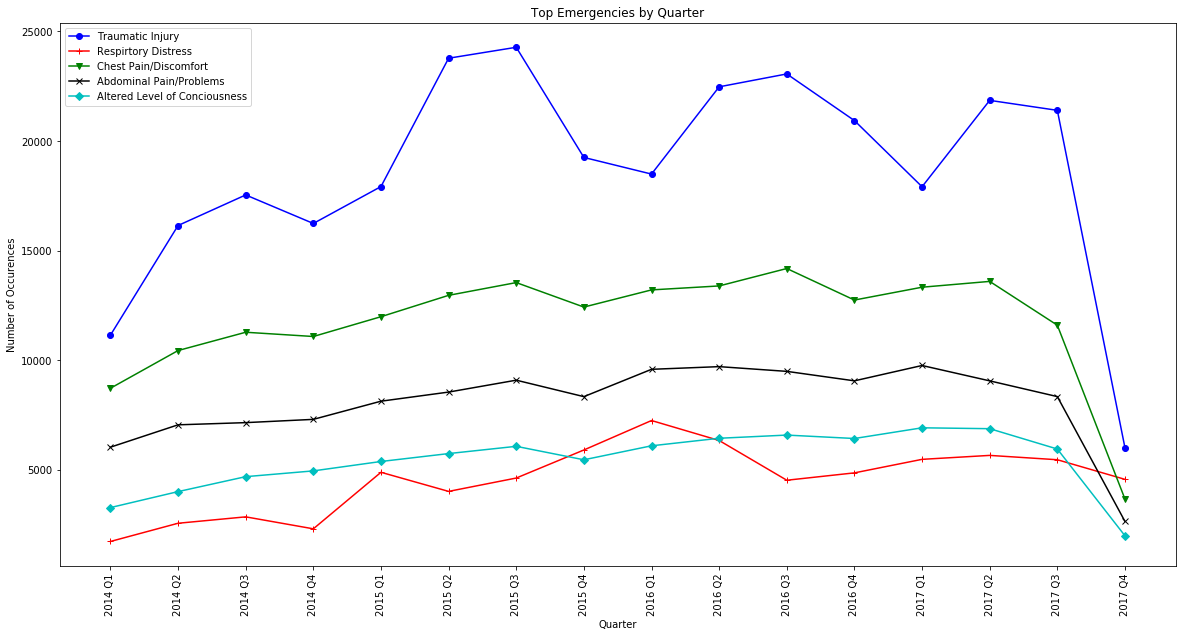

<Figure size 2880x1440 with 0 Axes>

In [51]:
plt.figure(figsize=(20,10))
plt.plot(quarters, traum, 'bo-', label='Traumatic Injury')
plt.plot(quarters, resp, 'r+-', label='Respirtory Distress')
plt.plot(quarters, chest, 'gv-', label='Chest Pain/Discomfort')
plt.plot(quarters, abdom, 'kx-', label='Abdominal Pain/Problems')
plt.plot(quarters, conc, 'cD-', label='Altered Level of Conciousness')
plt.xlabel('Quarter')
plt.ylabel('Number of Occurences')
plt.legend(loc='best')
plt.title("Top Emergencies by Quarter")
plt.xticks(rotation=90)
plt.figure(figsize=(40,20))
plt.show()

## Defines a function sortCounties which takes an array and returns each of the unique values and their counts. It then does a sort for the highest counts.



In [62]:
def sortCounties(array):
    a,b =np.unique(array, return_counts=True)
    counts, counties= zip(*sorted(zip(b,a), reverse=True))
    return counties, counts

## Uses sortCounties on the county arrays from each quarter as established in the sortByMonth function



In [64]:
ca, counts1=sortCounties(c14a)
cb, counts2=sortCounties(c14b)
cc, counts3=sortCounties(c14c)
cd, counts4=sortCounties(c14d)
ce, counts5=sortCounties(c15a)
cf, counts6=sortCounties(c15b)
cg, counts7=sortCounties(c15c)
ch, counts8=sortCounties(c15d)
ci, counts9=sortCounties(c16a)
cj, counts10=sortCounties(c16b)
ck, counts11=sortCounties(c16c)
cl, counts12=sortCounties(c16d)
cm, counts13=sortCounties(c17a)
cn, counts14=sortCounties(c17b)
co, counts15=sortCounties(c17c)
cp, counts16=sortCounties(c17d)

## Prints the top 10 counties for each of the quarters to determine which had the most emergencies. These counties will be the focus of the analysis.

In [65]:
print(ca[:10])
print(cb[:10])
print(cc[:10])
print(cd[:10])
print(ce[:10])
print(cf[:10])
print(cg[:10])
print(ch[:10])
print(ci[:10])
print(cj[:10])
print(ck[:10])
print(cl[:10])
print(cm[:10])
print(cn[:10])
print(co[:10])
print(cp[:10])

('MARION', 'VANDERBURGH', 'TIPPECANOE', 'HAMILTON', 'MONROE', 'BARTHOLOMEW', 'HENDRICKS', 'KOSCIUSKO', 'LAKE', 'HANCOCK')
('MARION', 'VANDERBURGH', 'TIPPECANOE', 'HAMILTON', 'MONROE', 'ALLEN', 'ST. JOSEPH', 'BARTHOLOMEW', 'HENDRICKS', 'KOSCIUSKO')
('MARION', 'ST. JOSEPH', 'VANDERBURGH', 'TIPPECANOE', 'HAMILTON', 'MONROE', 'ALLEN', 'HENDRICKS', 'VIGO', 'DELAWARE')
('MARION', 'VANDERBURGH', 'ST. JOSEPH', 'TIPPECANOE', 'DELAWARE', 'HAMILTON', 'ALLEN', 'HENDRICKS', 'MONROE', 'LAKE')
('MARION', 'VANDERBURGH', 'ST. JOSEPH', 'TIPPECANOE', 'LAKE', 'DELAWARE', 'HAMILTON', 'VIGO', 'ALLEN', 'HENDRICKS')
('MARION', 'VANDERBURGH', 'ST. JOSEPH', 'TIPPECANOE', 'VIGO', 'HAMILTON', 'DELAWARE', 'ALLEN', 'HENDRICKS', 'MONROE')
('MARION', 'VANDERBURGH', 'ST. JOSEPH', 'TIPPECANOE', 'HAMILTON', 'DELAWARE', 'HENDRICKS', 'VIGO', 'ALLEN', 'MONROE')
('MARION', 'ST. JOSEPH', 'VANDERBURGH', 'HAMILTON', 'DELAWARE', 'HENDRICKS', 'TIPPECANOE', 'VIGO', 'JOHNSON', 'MONROE')
('MARION', 'ST. JOSEPH', 'VANDERBURGH', 'HAM

## Based on the previous output, top 5 counties chosen and placed into topCounties array. Defines countyCount which takes and array and a county and puts the counts for each quarter into an array


In [66]:
topCounties=['MARION', 'VANDERBURGH', 'TIPPECANOE', 'LAKE', 'ST. JOSEPH']
def countyCount(array, county):
    array.append(counts1[ca.index(county)])
    array.append(counts2[cb.index(county)])
    array.append(counts3[cc.index(county)])
    array.append(counts4[cd.index(county)])
    array.append(counts5[ce.index(county)])
    array.append(counts6[cf.index(county)])
    array.append(counts7[cg.index(county)])
    array.append(counts8[ch.index(county)])
    array.append(counts9[ci.index(county)])
    array.append(counts10[cj.index(county)])
    array.append(counts11[ck.index(county)])
    array.append(counts12[cl.index(county)])
    array.append(counts13[cm.index(county)])
    array.append(counts14[cn.index(county)])
    array.append(counts15[co.index(county)])
    array.append(counts16[cp.index(county)])


## Establishes county arrays and uses county count for each

In [67]:
marion=[]
vand=[]
tipp=[]
lake=[]
stj=[]
countyCount(marion, topCounties[0])
countyCount(vand, topCounties[1])
countyCount(tipp, topCounties[2])
countyCount(lake, topCounties[3])
countyCount(stj, topCounties[4])

## Prints values to verify data

In [68]:
print(marion)
print(vand)
print(tipp)
print(lake)
print(stj)

[38584, 35861, 19351, 18072, 19725, 24689, 25893, 25546, 53413, 54845, 40252, 25920, 44447, 23771, 20595, 2979]
[7729, 8006, 7821, 8407, 8266, 8329, 8374, 8000, 7989, 8069, 8227, 8467, 8546, 8506, 7721, 3845]
[7524, 7453, 6818, 5504, 5665, 5977, 6474, 5262, 6182, 7563, 6754, 6883, 7873, 7611, 7127, 6374]
[2238, 1906, 1833, 3975, 5049, 4013, 3583, 2732, 2615, 3409, 11521, 10422, 10896, 5959, 3167, 867]
[1303, 3664, 7826, 7485, 7829, 8011, 8035, 8307, 8700, 8607, 9538, 9176, 8633, 8674, 7826, 337]


## Draws line chart for the count of each county for each quarter

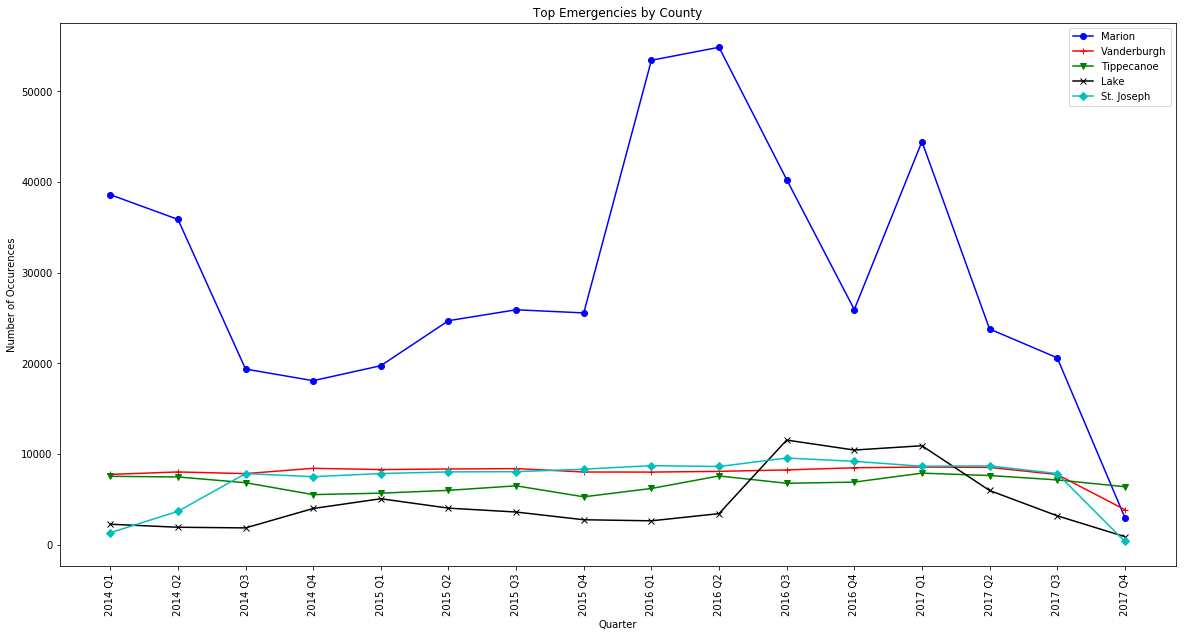

<Figure size 2880x1440 with 0 Axes>

In [70]:
plt.figure(figsize=(20,10))
plt.plot(quarters, marion, 'bo-', label='Marion')
plt.plot(quarters, vand, 'r+-', label='Vanderburgh')
plt.plot(quarters, tipp, 'gv-', label='Tippecanoe')
plt.plot(quarters, lake, 'kx-', label='Lake')
plt.plot(quarters, stj, 'cD-', label='St. Joseph')
plt.xlabel('Quarter')
plt.ylabel('Number of Occurences')
plt.legend(loc='best')
plt.title("Top Emergencies by County")
plt.xticks(rotation=90)
plt.figure(figsize=(40,20))
plt.show()

## Establishes strings for the SQL queries to get the number of each incident for Marion county

In [7]:
marion2014="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2014 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='MARION' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
marion2015="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2015 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='MARION' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
marion2016="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2016 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='MARION' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
marion2017="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2017 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='MARION' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"

## Defines function incbycounty which takes SQL query strings and returns the number of each emergency across all years. It places each of the emergencies and their counts in a dictionary. It then establishes an emergency array and then adds the count in each year for the emergency type



In [8]:
def incbycounty(stra, strb, strc, strd):
    holder=[stra, strb, strc, strd] #takes as input SQL query strings
    em= [] #arrays for emergency type and count
    cnt=[]
    dicta={} #dictionaries to hold type and count for each year as paired keys/values
    dictb={}
    dictc={}
    dictd={}
    dicts=[dicta, dictb, dictc, dictd] #array of dictionaries to use in for loop
    for i in range(len(holder)):
        cursor.execute(holder[i]) #for each string in holder, take the top 20 emergencies, place them into proper arrays
        rows = cursor.fetchall()
        for row in rows[:20]:
            em.append(row[0])
            cnt.append(row[1])
        dicts[i]={k:v for k, v in zip(cnt, em)} #for each dictionary, make it pair the emergency and count
        em=[] #make arrays empty for next for loop pass
        cnt=[]
    dicta=dicts[0]
    dictb=dicts[1]
    dictc=dicts[2]
    dictd=dicts[3]
    em1=list(dicta.values()) #places values into array
    em2=list(dictb.values())
    em3=list(dictc.values())
    em4=list(dictd.values())
    cnt1=list(dicta.keys())
    cnt2=list(dictb.keys())
    cnt3=list(dictc.keys())
    cnt4=list(dictd.keys())
    emtot=[] #here establishes total arrays to combine yeats
    cnttot=[]
    for i in range(len(em1)): #places emrgency and counts from 2014 into array
        emtot.append(em1[i])
        cnttot.append(cnt1[i])
    for i in range(len(em1)): 
        for a in range(len(em2)): #next 3 loops check the emergency and add the count to the total if emergencies match
            if (em2[a]==emtot[i]):
                cnttot[i]=cnttot[i]+cnt2[a]
    for i in range(len(em1)):
        for a in range(len(em3)):
            if (em3[a]==emtot[i]):
                cnttot[i]=cnttot[i]+cnt3[a]
    for i in range(len(em1)):
          for a in range(len(em4)):
            if (em4[a]==emtot[i]):
                cnttot[i]=cnttot[i]+cnt4[a]
    #print(dicta)
    #print(dictb)
    #print(dictc)
    #print(dictd)
    return emtot, cnttot
    

## Gets the incident counts for Marion county

In [9]:
em, cnt = incbycounty(marion2014, marion2015, marion2016, marion2017)

## Establishes the strings for SQL queries for Vanderburgh, Tippecanoe, Lake, and St. Joseph counties

In [10]:
vand2014="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2014 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='VANDERBURGH' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
vand2015="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2015 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='VANDERBURGH' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
vand2016="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2016 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='VANDERBURGH' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
vand2017="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2017 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='VANDERBURGH' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"

tipp2014="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2014 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='TIPPECANOE' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
tipp2015="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2015 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='TIPPECANOE' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
tipp2016="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2016 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='TIPPECANOE' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
tipp2017="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2017 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='TIPPECANOE' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"

lake2014="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2014 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='LAKE' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
lake2015="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2015 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='LAKE' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
lake2016="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2016 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='LAKE' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
lake2017="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2017 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='LAKE' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"

stj2014="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2014 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='ST. JOSEPH' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
stj2015="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2015 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='ST. JOSEPH' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
stj2016="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2016 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='ST. JOSEPH' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"
stj2017="SELECT DISTINCT SIT_PROVIDER_PRIM_IMPRESSION, COUNT(SIT_PROVIDER_PRIM_IMPRESSION)FROM emergency_medical_service_runs_2017 WHERE SIT_PROVIDER_PRIM_IMPRESSION <> 'null' AND INC_County ='ST. JOSEPH' GROUP BY SIT_PROVIDER_PRIM_IMPRESSION ORDER BY COUNT(SIT_PROVIDER_PRIM_IMPRESSION) DESC;"

##  Gets the incident counts for the other counties

In [11]:
vandem, vandcnt = incbycounty(vand2014, vand2015, vand2016, vand2017) 
tippem, tippcnt = incbycounty(tipp2014, tipp2015, tipp2016, tipp2017) 
lakeem, lakecnt = incbycounty(lake2014, lake2015, lake2016, lake2017) 
stjem, stjcnt = incbycounty(stj2014, stj2015, stj2016, stj2017)

## Defines function graphCounty which takes in 2 arrays and a title. These arrays are the total emergency and count arrays from the incbycounty function. The function sorts by the count of each emergency and graphs the top 10.



In [12]:
def graphCounty(a,b,title):
    y,x = zip(*sorted(zip(b,a), reverse=True)) #sorts by count
    y=y[:10] #returns top 10
    x=x[:10]
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel("Type of Emergency")
    plt.xticks(rotation=90)
    plt.ylabel("Number of Occurences")
    plt.show()

## Graphs top emergencies for Marion County

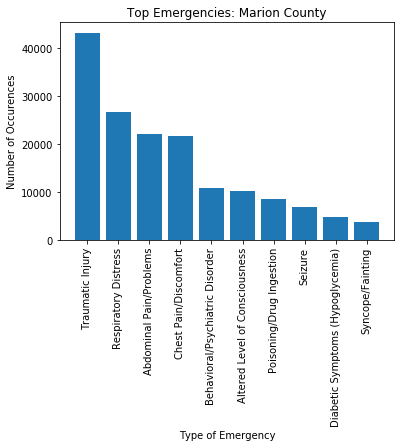

In [13]:
graphCounty(em, cnt, "Top Emergencies: Marion County")

## Graphs top emergencies for Vanderburgh County

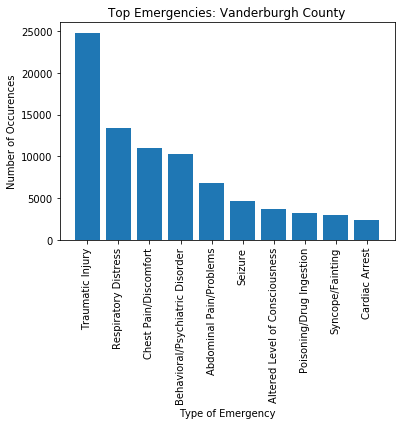

In [88]:
graphCounty(vandem, vandcnt, "Top Emergencies: Vanderburgh County")

## Graphs top emergencies for Tippecanoe County

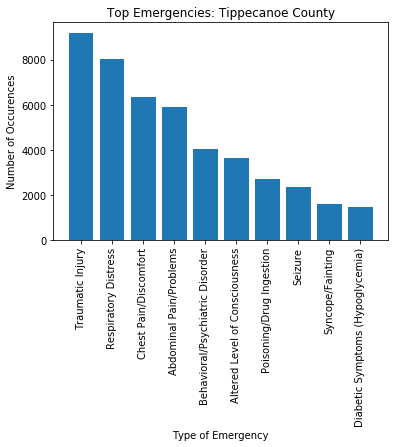

In [89]:
graphCounty(tippem, tippcnt, "Top Emergencies: Tippecanoe County")

## Graphs top emergencies for Lake County

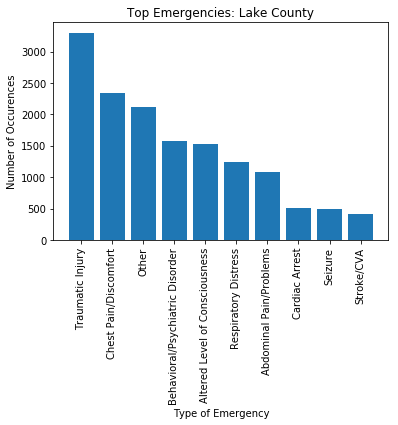

In [90]:
graphCounty(lakeem, lakecnt, "Top Emergencies: Lake County")

## Graphs top emergencies for St. Joseph County

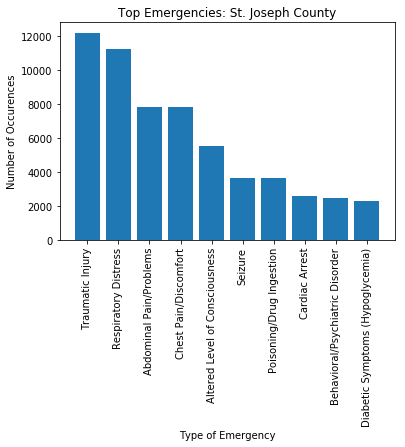

In [91]:
graphCounty(stjem, stjcnt, "Top Emergencies: St. Joseph County")

## Establishes a second conn and cursor to pull from a different database, This is the population for each county for each year. Creates arrays for each year and puts the population for each year into them

In [14]:
conn2 = MySQLdb.connect(host="localhost", user="rphiland", passwd="rphiland", db="rphiland_db")

cursor2 = conn2.cursor()
strpop="SELECT * FROM `TABLE 19`"
cursor2.execute(strpop)
rows = cursor2.fetchall()
county=[]
pop2014=[]
pop2015=[]
pop2016=[]
pop2017=[]
for row in rows[2:]:
    county.append(str(row[0]))
    pop2014.append(row[4])
    pop2015.append(row[3])
    pop2016.append(row[2])
    pop2017.append(row[1])

## The population is of the form ' XXX,XXX ' and is a string. Defines a function strToInt which removes the spaces and commas and converts the string to an int

In [15]:
def strToInt(a):
    for i in range(len(a)):
        a[i]=a[i].replace(" ","").replace(",","")
        a[i]=int(a[i])
    return a

In [16]:
pop2014=strToInt(pop2014)
pop2015=strToInt(pop2015)
pop2016=strToInt(pop2016)
pop2017=strToInt(pop2017)

In [17]:
#Print to verify data
print(pop2014)

[34763, 365084, 80350, 8720, 12339, 61602, 14943, 19956, 38493, 114066, 26424, 32493, 10669, 32678, 49421, 26427, 42387, 116448, 42287, 201673, 23443, 76083, 16694, 22956, 20512, 33723, 68371, 32629, 302828, 71749, 39166, 155717, 48892, 82563, 36603, 43719, 33502, 21140, 32410, 27910, 147017, 37958, 78605, 38443, 491156, 111717, 45646, 129718, 935745, 46938, 10235, 36078, 143405, 38161, 69498, 14091, 47400, 5963, 19762, 21029, 17245, 19332, 12550, 167192, 25599, 12919, 37666, 25313, 28335, 16844, 267733, 23628, 44367, 20761, 22952, 34518, 20999, 10552, 183705, 15392, 7249, 182128, 15657, 107842, 32106, 8335, 60947, 27894, 67353, 27798, 24434, 33439]


## Establishes strings for SQL queries to get the number of times each county appears in each year



In [18]:
straa = "SELECT DISTINCT INC_COUNTY, COUNT(INC_COUNTY) FROM emergency_medical_service_runs_2014 GROUP BY INC_COUNTY ORDER BY INC_COUNTY;"
strbb = "SELECT DISTINCT INC_COUNTY, COUNT(INC_COUNTY) FROM emergency_medical_service_runs_2015 GROUP BY INC_COUNTY ORDER BY INC_COUNTY;"
strcc = "SELECT DISTINCT INC_COUNTY, COUNT(INC_COUNTY) FROM emergency_medical_service_runs_2016 GROUP BY INC_COUNTY ORDER BY INC_COUNTY;"
strdd = "SELECT DISTINCT INC_COUNTY, COUNT(INC_COUNTY) FROM emergency_medical_service_runs_2017 GROUP BY INC_COUNTY ORDER BY INC_COUNTY;"

## Defines a function which returns the county names and their counts for each year from a set of SQL query strings

In [19]:
def normalizeCounties(a,b,c,d):
    acounty = [] #arrays to hold data
    aincs = []
    bcounty = []
    bincs = []
    ccounty = []
    cincs =[]
    dcounty = []
    dincs = []
    cursor.execute(a) #for each string places county and the number of incidents into proper array
    rows=cursor.fetchall()
    for row in rows:
        acounty.append(row[0])
        aincs.append(row[1])
    cursor.execute(b)
    rows=cursor.fetchall()
    for row in rows:
        bcounty.append(row[0])
        bincs.append(row[1])
    cursor.execute(c)
    rows=cursor.fetchall()
    for row in rows:
        ccounty.append(row[0])
        cincs.append(row[1])
    cursor.execute(d)
    rows=cursor.fetchall()
    for row in rows:
        dcounty.append(row[0])
        dincs.append(row[1])
    return acounty, aincs, bcounty, bincs, ccounty, cincs, dcounty, dincs

In [20]:
#Uses normalizeCounties on the established strings
a2014, b2014, a2015, b2015, a2016, b2016, a2017, b2017 = normalizeCounties(straa, strbb, strcc, strdd)

## Prints the list of counties from poplulation data and emergency data. They do not match, so a function is needed to include only those that match

In [59]:
print(county)
print(a2014)

['Adams', 'Allen', 'Bartholomew', 'Benton', 'Blackford', 'Boone', 'Brown', 'Carroll', 'Cass', 'Clark', 'Clay', 'Clinton', 'Crawford', 'Daviess', 'Dearborn', 'Decatur', 'DeKalb', 'Delaware', 'Dubois', 'Elkhart', 'Fayette', 'Floyd', 'Fountain', 'Franklin', 'Fulton', 'Gibson', 'Grant', 'Greene', 'Hamilton', 'Hancock', 'Harrison', 'Hendricks', 'Henry', 'Howard', 'Huntington', 'Jackson', 'Jasper', 'Jay', 'Jefferson', 'Jennings', 'Johnson', 'Knox', 'Kosciusko', 'LaGrange', 'Lake', 'LaPorte', 'Lawrence', 'Madison', 'Marion', 'Marshall', 'Martin', 'Miami', 'Monroe', 'Montgomery', 'Morgan', 'Newton', 'Noble', 'Ohio', 'Orange', 'Owen', 'Parke', 'Perry', 'Pike', 'Porter', 'Posey', 'Pulaski', 'Putnam', 'Randolph', 'Ripley', 'Rush', 'St. Joseph', 'Scott', 'Shelby', 'Spencer', 'Starke', 'Steuben', 'Sullivan', 'Switzerland', 'Tippecanoe', 'Tipton', 'Union', 'Vanderburgh', 'Vermillion', 'Vigo', 'Wabash', 'Warren', 'Warrick', 'Washington', 'Wayne', 'Wells', 'White', 'Whitley']
['ADAMS', 'ALLEN', 'ANCHO

## Removes string ' County' from the initial list and makes them uppercase

In [21]:
for i in range(len(county)):
    county[i] = county[i].replace(" County", "")
county2=[]
for x in county:
    county2.append(x.upper())
print(county2)

['ADAMS', 'ALLEN', 'BARTHOLOMEW', 'BENTON', 'BLACKFORD', 'BOONE', 'BROWN', 'CARROLL', 'CASS', 'CLARK', 'CLAY', 'CLINTON', 'CRAWFORD', 'DAVIESS', 'DEARBORN', 'DECATUR', 'DEKALB', 'DELAWARE', 'DUBOIS', 'ELKHART', 'FAYETTE', 'FLOYD', 'FOUNTAIN', 'FRANKLIN', 'FULTON', 'GIBSON', 'GRANT', 'GREENE', 'HAMILTON', 'HANCOCK', 'HARRISON', 'HENDRICKS', 'HENRY', 'HOWARD', 'HUNTINGTON', 'JACKSON', 'JASPER', 'JAY', 'JEFFERSON', 'JENNINGS', 'JOHNSON', 'KNOX', 'KOSCIUSKO', 'LAGRANGE', 'LAKE', 'LAPORTE', 'LAWRENCE', 'MADISON', 'MARION', 'MARSHALL', 'MARTIN', 'MIAMI', 'MONROE', 'MONTGOMERY', 'MORGAN', 'NEWTON', 'NOBLE', 'OHIO', 'ORANGE', 'OWEN', 'PARKE', 'PERRY', 'PIKE', 'PORTER', 'POSEY', 'PULASKI', 'PUTNAM', 'RANDOLPH', 'RIPLEY', 'RUSH', 'ST. JOSEPH', 'SCOTT', 'SHELBY', 'SPENCER', 'STARKE', 'STEUBEN', 'SULLIVAN', 'SWITZERLAND', 'TIPPECANOE', 'TIPTON', 'UNION', 'VANDERBURGH', 'VERMILLION', 'VIGO', 'WABASH', 'WARREN', 'WARRICK', 'WASHINGTON', 'WAYNE', 'WELLS', 'WHITE', 'WHITLEY']


## Defines function incByPop which checks the counties and divides the number of incidents by the population if they match

In [22]:
def incByPop(a,b,c,d): #a and c are the lists of counties, d is number of incidents, b is population
    countyname = []
    perperson =[]
    for i in range(len(a)):
        countyname.append(a[i]) #places county name into array
        for x in range(len(c)):
            if a[i]==c[x]:
                perperson.append(d[x]/b[i]) #when name matches in the other county array, divide number of incidents by pop
    return countyname, perperson

In [23]:
#Uses incByPop for each year
c2014p, person2014 = incByPop(county2, pop2014, a2014, b2014)
c2015p, person2015 = incByPop(county2, pop2015, a2015, b2015)
c2016p, person2016 = incByPop(county2, pop2016, a2016, b2016)
c2017p, person2017 = incByPop(county2, pop2017, a2017, b2017)

## Defines function which sorts the counties by incidents per person and returns a table

In [26]:
def makeTable(a, b):
    columnlabels = ['County', 'Incidents per Person']
    tablevals =[]
    rowvals=[]
    y,x = zip(*sorted(zip(b,a), reverse=True))
    for i in range(len(x)):
        row=[]
        row.append(x[i])
        row.append(y[i])
        rowvals.append(i+1)
        tablevals.append(row)
    table = plt.table(rowLabels = rowvals, colLabels = columnlabels, cellText =
tablevals, cellLoc = 'center', loc = 'center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2, 2.5)
    plt.axis('off')
    plt.show()

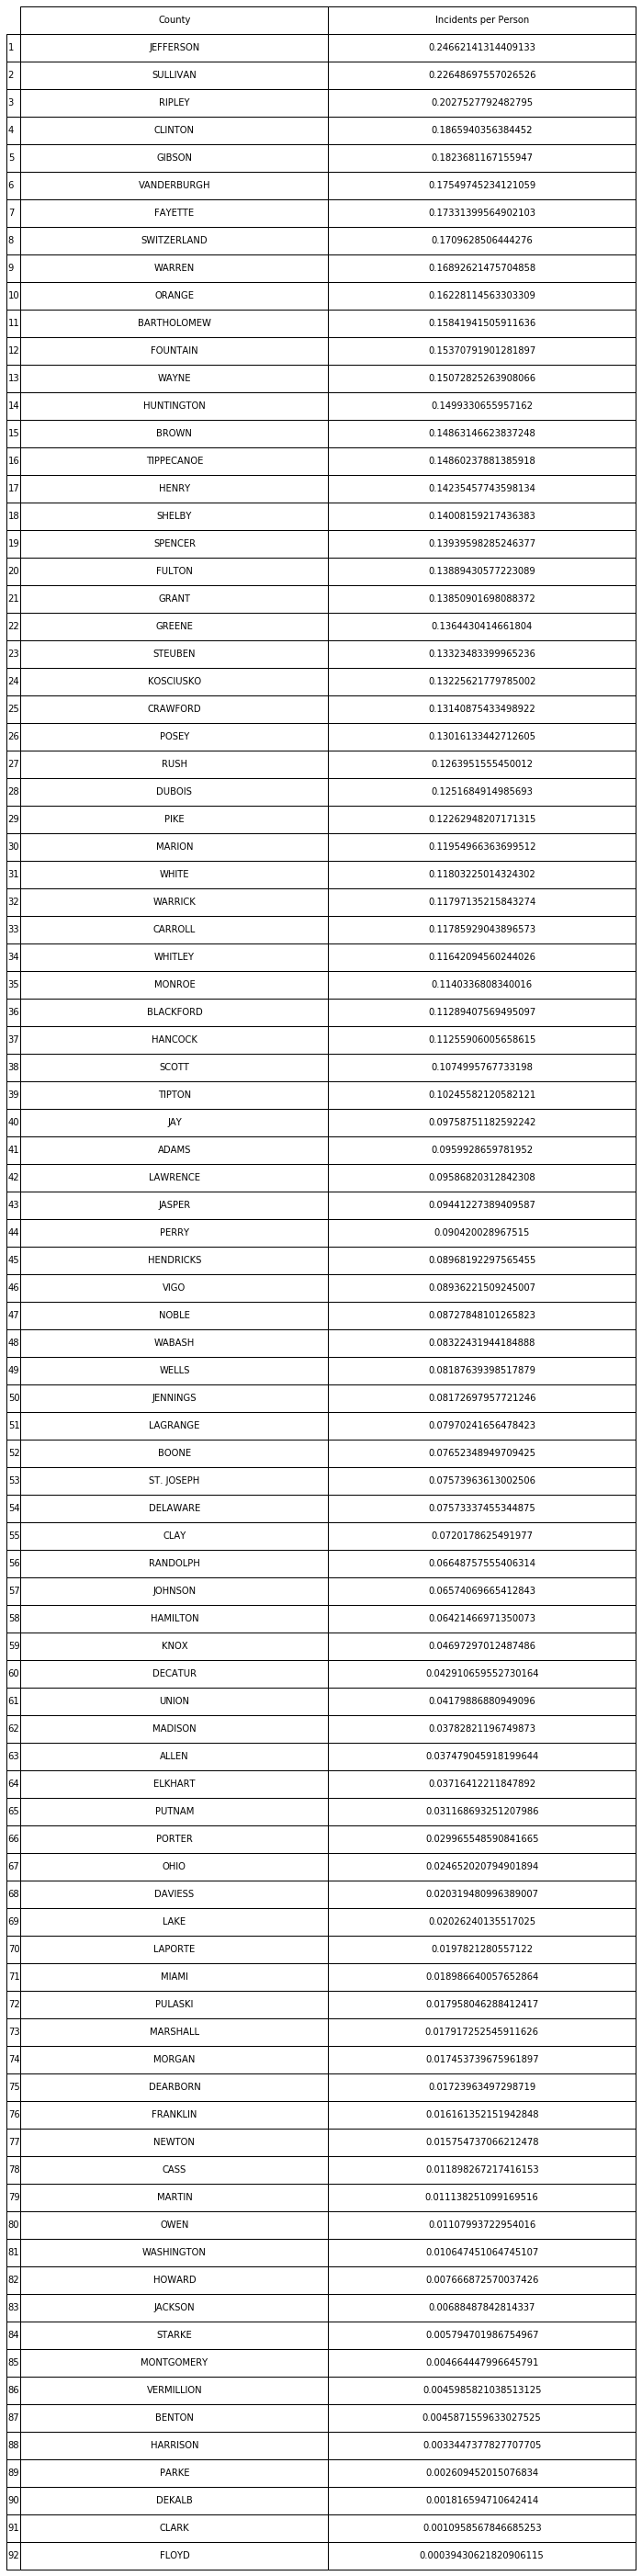

In [27]:
#Table for 2014
makeTable(c2014p, person2014)

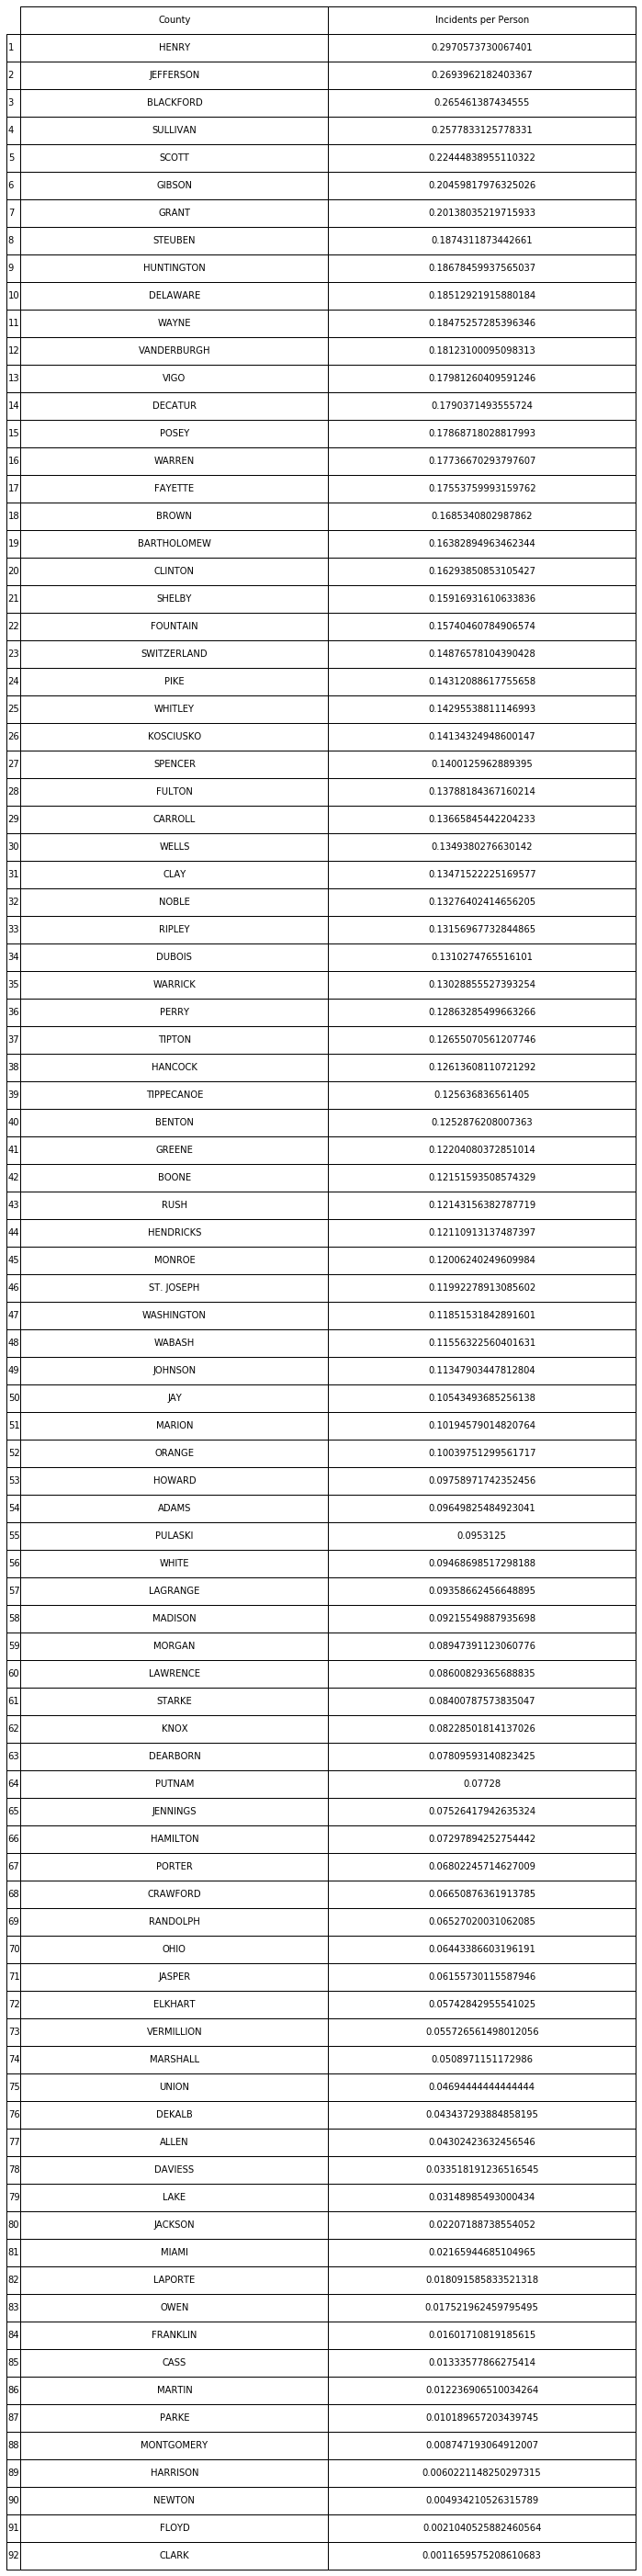

In [28]:
#Table for 2015
makeTable(c2015p, person2015)

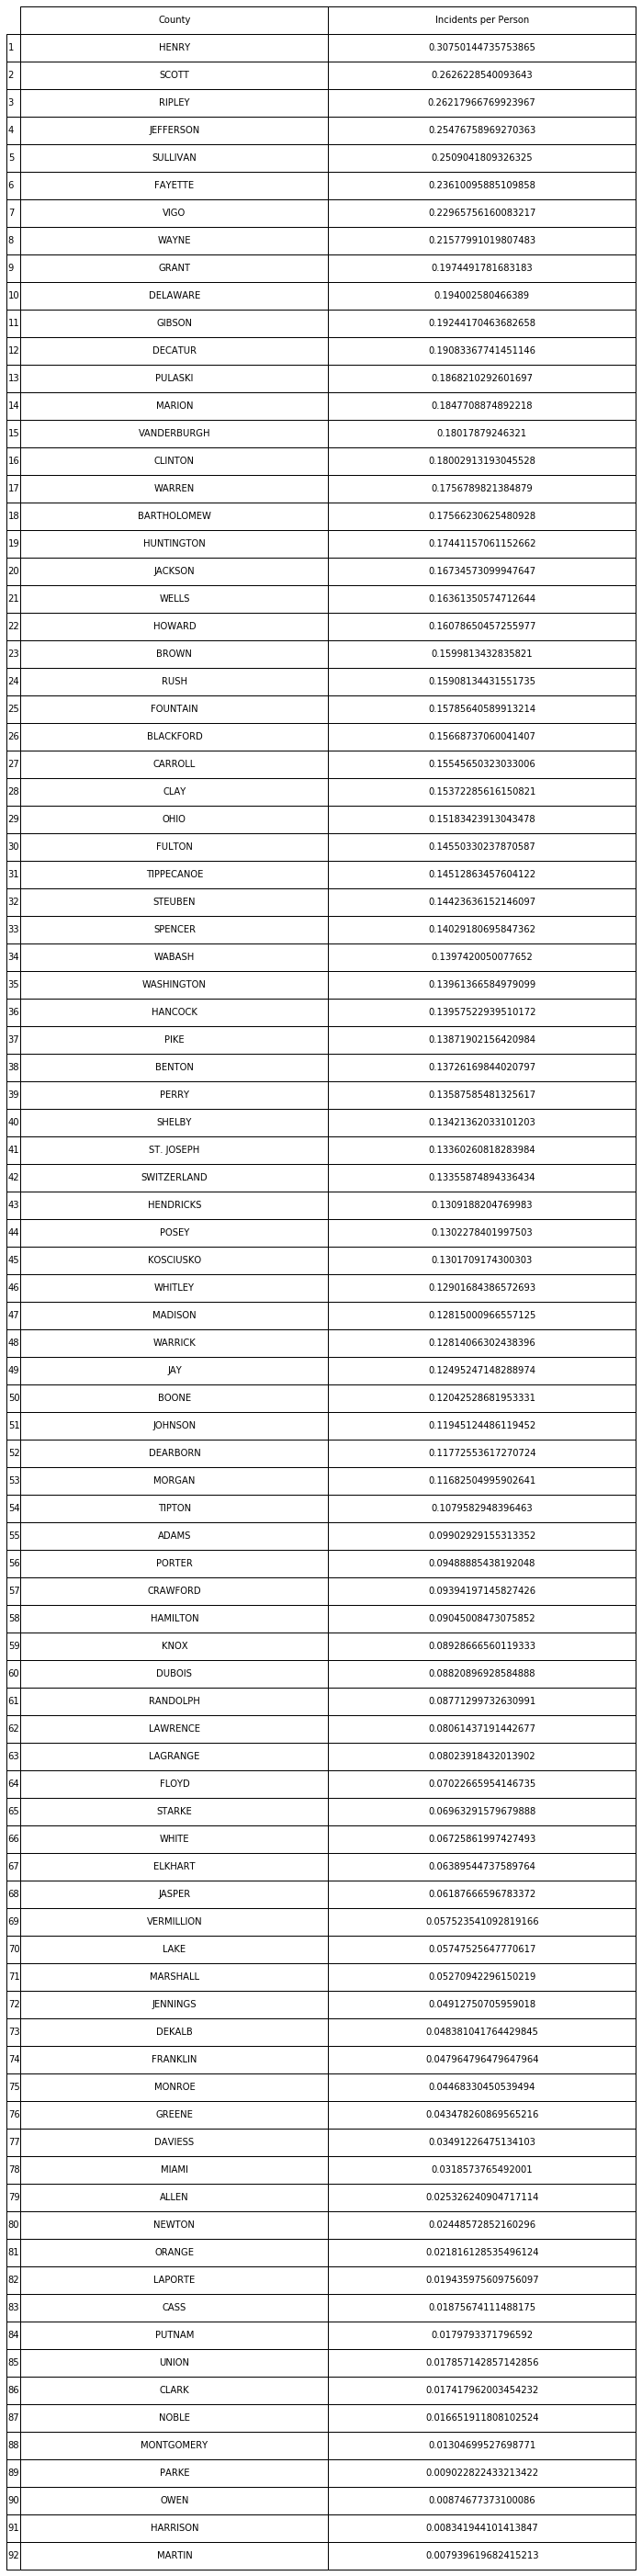

In [29]:
#Table for 2016
makeTable(c2016p, person2016)

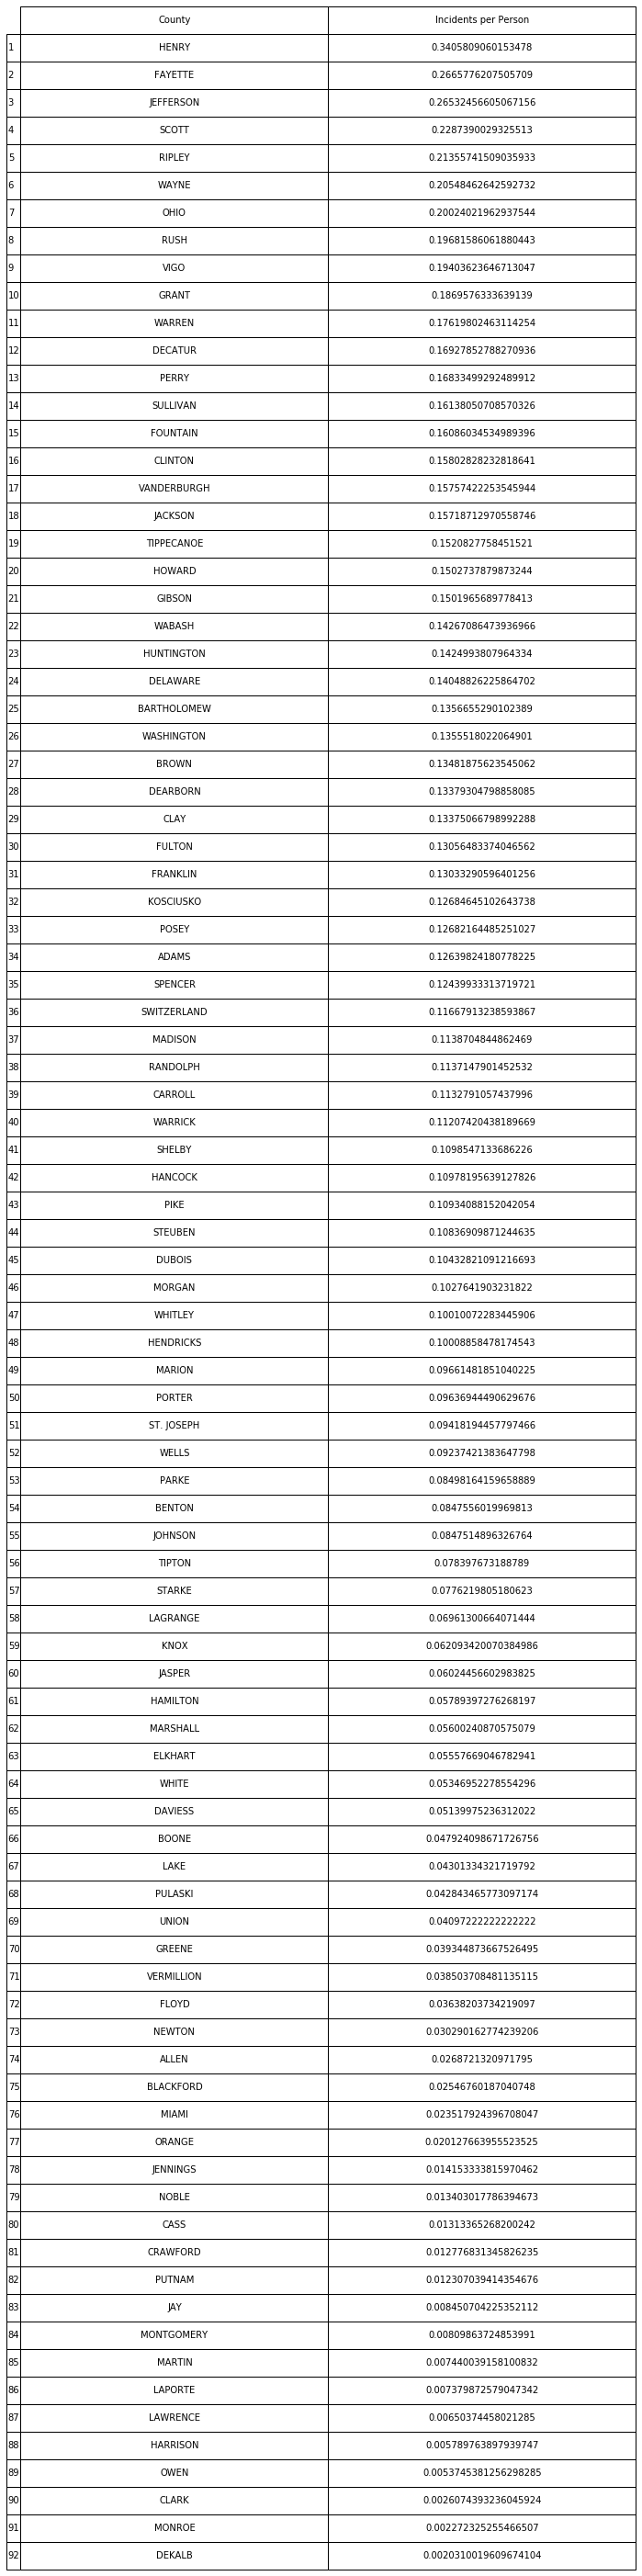

In [30]:
#Table for 2017
makeTable(c2017p, person2017)